<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# IntML2020 - Teoría Bayesiana - Distribuciones Normales Bivariadas

Puede ayudarse con la siguientes paginas 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, multivariate_normal 
from numpy.linalg import inv, det
from random import random
import seaborn as sns

# Ejercicio 1
En muchos problemas de clasificacion de patrones se tiene la opcion de asignar un
 patron a una de $c$ clases, o de rechazarlo como irreconocible. Si el costo de
 hacer esto ultimo no es demasiado alto, puede ser una accion deseable. Sea

  $$\lambda(\alpha_i|\omega_j)=\left\{\begin{array}{ccc}
 0& \ &\mbox{ si }i=j, \ i,j=1,2,\ldots,c\\
 \lambda_r&&\mbox{ si }i=c+1\\
 \lambda_s&&\mbox{ en otro caso}\\
\end{array}\right.$$

 donde $\lambda_r$ es la pérdida sufrida por la eleccion de rechazarlo, y $\lambda_s$ es la
 pérdida incurrida por cometer un error. Mostrar que el riesgo mínimo se obtiene
 si decidimos $\omega_i$ si $P(\omega_i|x)\geq P (\omega_j|x)$ para todo $j$, y si $P(\omega_i|x)\geq 1-\frac{\lambda_r}{\lambda_s}$, caso contrario, rechazar. ¿Que sucede si $\lambda_r= 0$? ¿Que sucede si $\lambda_r>\lambda_s$?.
 


 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>

Tenemos que el riesgo total se minimiza si minimizamos cada $R(\alpha_i|x)$. El valor de $R(\alpha_i | x)$ para $1 \le i \le c$ está dado por: 
$$R(\alpha_i | x) = \sum_{j=1}^c \lambda(\alpha_i | \omega_j) P(\omega_j|x) = \sum_{j=1, j\neq i}^c \lambda_s P(\omega_j|x) = \lambda_s (1-P(\omega_i | x)),$$
y $$R(\alpha_{c+1} | x) = \sum_{j=1} \lambda(\alpha_{c+1} | \omega_j) P(\omega_j|x) = \lambda_r \sum_{j=1}^c P(\omega_j|x) =  \lambda_r.$$
Para $i\le c$, el riesgo se minimiza si $P(\alpha_i|x)$ es máximo en el conjunto de los $P(\alpha_j|x)$, ya que $\lambda(\alpha_i|\omega_i) = 0$. Ahora, $R(\alpha_i |x)\le R(\alpha_{c+1}|x)$ si y sólo si 
$$\lambda_s (1-P(\alpha_i|x)) \le \lambda_r \qquad \mbox{si y sólo si} \qquad 1-P(\alpha_i|x) \le \frac{\lambda_r}{\lambda_s}\qquad \mbox {si y sólo si} \qquad P(\alpha_i|x) \ge 1-\frac{\lambda_r}{\lambda_s}$$

Si $\lambda_r = 0$, entonces por lo que acabamos de ver el riesgo total se minimiza si se rechaza en todos los casos.

Si $\lambda_r>\lambda_s$, entonces en ningún caso conviene rechazar puesto que $1-\frac{\lambda_r}{\lambda_s} < 0$.


# Ejercicio 2.
Considere el problema de clasificacion con la opcion de rechazo como irreconocible.

* (a)  Utilice los resultados del ejercicio anterior para demostrar que las siguientes funciones discriminantes son optimas para este tipo de problemas:

$$g_i(x)=\left\{\begin{array}{ccc}
 p(x|\omega_i)P(\omega_i)& \ &\mbox{ si }i=1,2,\ldots,c\\
 \displaystyle\frac{\lambda_s-\lambda_r}{\lambda_s}\displaystyle\sum_{j=1}^cp(x|\omega_j)P(\omega_j)&&\mbox{ si }i=c+1\\
\end{array}\right.$$

* (b) Grafique esta funcion discriminante y las regiones de decision para el caso del problema unidimensional con dos clases, teniendo

    * $x|\omega_1\sim \mathcal{N}(1, 1)$,
    *  $x|\omega_2\sim \mathcal{N}(-1,1)$,
    * $P(\omega_1) =P(\omega_2)=\displaystyle\frac12$, y
    * $\displaystyle\frac{\lambda_r}{\lambda_s}=\displaystyle\frac14$

* (c) Describa cualitativamente lo que sucede cuando $\displaystyle\frac{\lambda_r}{\lambda_s}$ se incrementa de $0$ a $1$.
* (d) Repita el procedimiento para el caso

    * $x|\omega_1\sim \mathcal{N}(1, 1)$,
    * $x|\omega_2\sim \mathcal{N}\left(0,\displaystyle\frac14\right)$,
    * $P(\omega_1)=\displaystyle\frac13$, $P(\omega_2)=\displaystyle\frac23$, y
    * $\displaystyle\frac{\lambda_r}{\lambda_s}=\displaystyle\frac12$



 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>



* (a) Según esta función discriminante, dada la característica $x$ se elige la clase $\omega_i$ si 

$$
p(x|\omega_i)P(\omega_i) \ge p(x|\omega_j)P(\omega_j)  \qquad (1)
$$ 

para $j\neq i$ y además no se la rechaza, es decir:

$$\lambda_s p(x|\omega_i)P(\omega_i) \ge (\lambda_s-\lambda_r)\displaystyle\sum_{j=1}^cp(x|\omega_j)P(\omega_j)\qquad (2).$$


Dividiendo por $p(x)$ (asumiendo que no es $0$, y si no también es cierto), tenemos que (1) equivale a 

$$P(\omega_i | x) \ge P(\omega_j|x), \qquad i \neq j, \qquad (3).$$


Simplificando en (2) en ambos miembros de la desigualdad el término 
$\lambda_s p(x|\omega_i)P(\omega_i)$ y observando que la sumatoria $\sum_{j=1}^c p(x|\omega_j)P(\omega_j) = p(x)$, tenemos que la función no rechaza la clase $\omega_i$ si 

$$\lambda_s \sum_{j\neq i} p(x|\omega_j)P(\omega_j) = \lambda_s (p(x)-p(x |\omega_i)P(\omega_i)) \ge \lambda_r p(x). \qquad (4)$$


Dividiendo por $p(x)$  y observando que $p(x |\omega_j)P(\omega_j) = P(\omega_j|x)p(x)$ concluimos de (3) y (4) que $g_i(x)$ clasifica en $\omega_i$ si


$$P(\omega_i|x) \ge P(\omega_j|x), \quad \mbox{para }{j \neq i} \quad \mbox{ y } \quad
P(\omega_i|x)) \le 1-\frac{\lambda_r}{\lambda_s}.$$


Luego esta función discriminante produce la elección de la clase $\omega_i$ que produce el riesgo mínimo, según lo probado en el Ejercicio 1.

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

Tenemos que para este caso particular, 
$$g_i(x)=\left\{\begin{array}{ccc}
 p(x|\omega_1)P(\omega_1)& \ &\mbox{ si }i=1\\
 p(x|\omega_2)P(\omega_2)& \ &\mbox{ si }i=2\\
 \displaystyle (1-\frac{\lambda_r}{\lambda_s})\displaystyle (p(x|\omega_1)P(\omega_1)+p(x|\omega_2)P(\omega_2))&&\mbox{ si }rechazo\\
\end{array}\right.$$


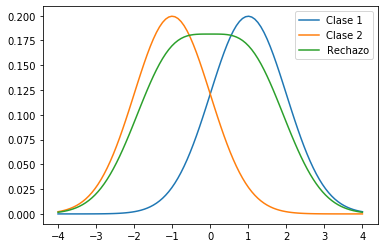

In [2]:
x = np.linspace(-4,4,100)
g1 = (1/2) * norm.pdf(x,1,1)
g2 = (1/2) * norm.pdf(x,-1,1)
g3 = (1-(1/4)) * (g1 + g2)
fig,ax = plt.subplots()
plt.plot(x,g1,label= 'Clase 1')
plt.plot(x,g2,label= 'Clase 2')
plt.plot(x,g3,label= 'Rechazo')
plt.legend(loc='best')

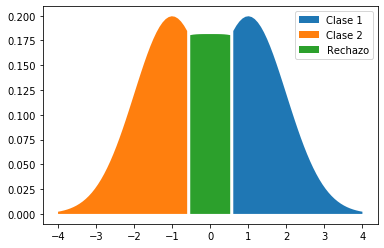

In [3]:

plt.fill_between(x,0,g1,where = (g1 >= g2) & (g1 >= g3),label='Clase 1')
plt.fill_between(x,0,g2,where = (g2 >= g1) & (g2 >= g3),label='Clase 2')
plt.fill_between(x,0,g3,where = (g3 >= g2) & (g3 >= g1),label='Rechazo')
plt.legend(loc='best')

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

A medida que aumentamos $\displaystyle\frac{\lambda_r}{\lambda_s}$ hacia 1, lo que sucede es que el coste de rechazar aumenta, entonces $P(x|\omega_{i}*P(\omega_{i})) = P(\omega_{1}|x) \ge 1 - \displaystyle\frac{\lambda_r}{\lambda_s}$ se cumple más frecuentemente entonces terminamos rechazando en menos casos. Si $\displaystyle\frac{\lambda_r}{\lambda_s} = 1$, como $P(\omega_{1}|x) > 1 - 1  = 0$ se satisface siempre, osea, en ningun momento es conveniente rechazar. 

Por otro lado, si $\displaystyle\frac{\lambda_r}{\lambda_s}$ tiende a 0, estamos disminuyendo el costo de la accion de rechazar, por lo tanto vamos a rechazar más frecuentemente. Cuando $\displaystyle\frac{\lambda_r}{\lambda_s} = 0$, $P(\omega_{1}|x) > 1 - 0  = 1$ y siempre nos conviene rechazar. 

Text(0.5, 1.0, 'Rechazo cuando $\\frac{\\lambda_r}{\\lambda_s} = 0$ ')

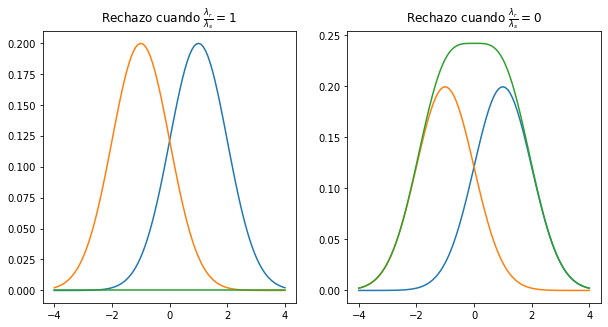

In [4]:
x = np.linspace(-4,4,100)
g1 = (1/2) * norm.pdf(x,1,1)
g2 = (1/2) * norm.pdf(x,-1,1)
g3 = (0 * (g1 + g2))
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(x,g1,label= 'Clase 1')
ax1.plot(x,g2,label= 'Clase 2')
ax1.plot(x,g3,label= r'Rechazo cuando \frac{\lambda_r}{\lambda_s} = 1 ')
ax1.set_title(r'Rechazo cuando $\frac{\lambda_r}{\lambda_s} = 1$ ')
g3 = (1 * (g1 + g2))
ax2.plot(x,g1)
ax2.plot(x,g2)
ax2.plot(x,g3)
ax2.set_title(r'Rechazo cuando $\frac{\lambda_r}{\lambda_s} = 0$ ')


 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

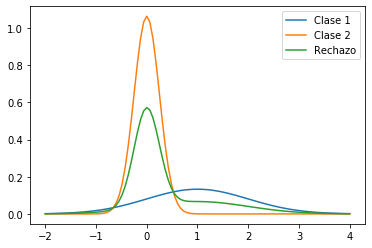

In [34]:
x = np.linspace(-2,4,100)
g1 = (1/3) * norm.pdf(x,1,1)
g2 = (2/3) * norm.pdf(x,0,1/4)
g3 = (1/2) * (g1 + g2)
fig,ax = plt.subplots()
plt.plot(x,g1,label= 'Clase 1')
plt.plot(x,g2,label= 'Clase 2')
plt.plot(x,g3,label= 'Rechazo')
plt.legend(loc='best')

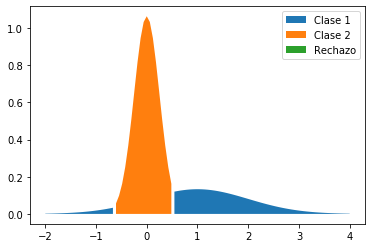

In [35]:

plt.fill_between(x,0,g1,where = (g1 >= g2) & (g1 >= g3),label='Clase 1')
plt.fill_between(x,0,g2,where = (g2 >= g1) & (g2 >= g3),label='Clase 2')
plt.fill_between(x,0,g3,where = (g3 >= g2) & (g3 >= g1),label='Rechazo')
plt.legend(loc='best')

Podemos ver que en este caso no conviene rechazar nunca


# Ejercicio 3. 

Verifique que en el caso Normal bivariado , asumiendo clases equiprobables y la misma matriz de varianza covarianza, vale: 

* a) Si $\Sigma=\sigma^2 I$, maximizar $g_i({\bf x})$ implica minimizar la distancia euclidea entre ${\bf x}$ y ${\bf \mu_i}$,


* b) Si $\Sigma$ no diagonal, maximizar $g_i({\bf x})$ implica minimizar la distancia de Mahalanobis entre ${\bf x}$ y ${\bf \mu_i}$. 


* c) En una tarea de clasificacion de dos clases con dos caracteristicas, los vectores son generados por distribuciones normales que comparten la misma matriz de varianza covarianza ${\bf x}|\omega_1\sim \mathcal{N}(\mathbf{0},\left(\begin{array}{cc}
1.1&0.3\\
 0.3& 1.9\end{array}\right))$, ${\bf x} |\omega_2\sim \mathcal{N}\left(\left(\begin{array}{c}
 3\\ 3\end{array}\right),\left(\begin{array}{cc}
1.1&0.3\\
 0.3& 1.9\end{array}\right)\right)$. Clasifique el vector $(1,2.2)$ acorde con el clasificador Bayesiano. Coincide dicha clase con la clase cuya media es la más cercana (usando la distancia Euclidea)?


* d) Compute los ejes principales del elipse centrado en (0,0) que corresponde a la distanca de Mahalanobis $dm= \sqrt{ 2.952}$ del centro. 





 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>



a) Para el caso normal, se tiene que 
$$g_i(x) = \left( (2\pi)^k \det(\Sigma)\right)^{-1/2} \exp\left(-\frac 12(x-\mu)'\Sigma^{-1}(x-\mu)\right)\cdot P(\omega_i).$$
Tomando logaritmos resulta:
$$\log g_i(x) = -\frac k2 \log(2\pi) -\frac {\log(\det(\Sigma))}2 - \frac 12(x-\mu)'\Sigma^{-1}(x-\mu)+\log P(\omega_i).$$
Eliminando los términos que son iguales para todas las clases, sólo queda el término que incluye a la media $\mu$. Luego podemos tomar la función discriminante como:
$$g_i(x) = -(x-\mu)'\Sigma^{-1}(x-\mu) = \sigma^{-2}  (x-\mu)'(x-\mu).$$
Luego multiplicando por $\sigma^2$ y calculando la raíz cuadrada resulta $$g_i(x) = -||x-\mu||_2,$$ el opuesto de la distancia euclídea.
Así, como el clasificador clasifica en la clase $i$ si $g_i(x)$ es máximo, esto es equivalente a que la distancia euclídea sea mínima.


 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

Recordemos que asumimos que las clases son equiprobables y tienen misma matriz de covarianzas, luego podemos hacer simplificaciones muy similares a las del inciso anterior:
Vamos a tomar logaritmo pues al ser el logaritmo una funcion monotona creciente, obtenemos un discriminante equivalente (genera las mismas regiones de desición).
$$\log g_i(x) = -\frac k2 \log(2\pi) -\frac {\log(\det(\Sigma))}2 - \frac 12(x-\mu)'\Sigma^{-1}(x-\mu)+\log P(\omega_i).$$  
De nuevo, vamos a simplificar los terminos que son iguales para todas las clases, osea $\det(\Sigma)$ y $\cfrac k2$, quedandonos con:
$$
g_i{x} = -\cfrac 12 (x-\mu)' \Sigma ^{-1}(x-\mu) + \log P(\omega_{i})
$$
Como ademas las probabilidades a priori son iguales, tambien podemos ignorar $\log P(\omega_{i})$ quedandonos
$$
g_i{x} = -\cfrac 12 (x-\mu)' \Sigma ^{-1}(x-\mu)
$$
Que eso es el opuesto, multiplicado por $\cfrac 12$ de la distancia de Mahalanobis. Luego, minimizando la distancia, maximizamos nuestra funcion discriminante

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

Para clasificar este vector con la regla de desición bayesiana, por lo probado en el inciso b (clases con la misma matriz de varianza-covarianzas no diagonal e igualmente ditribuidas), esto es tan sencillo como calcular la distancia de Mahalanobis de $x$ a los vectores de media de cada clase, y asignamos a $x$ la clase a la cual tenga menor distancia:  

In [7]:
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import euclidean
mu1 = [0,0]
mu2 = [3,3]
x = [1,2.2]
vcov = [[1.1,0.3],[0.3,1.9]]
ivcov = np.linalg.inv(vcov)

In [8]:
mahalanobis(mu1,x,ivcov)

1.7181385275931627

In [9]:
mahalanobis(mu2,x,ivcov)

1.9162463307205573

Clasificamos a $x = (1,2.2)$ como de la clase $\omega_{1}$

In [10]:
euclidean(mu1,x)

2.4166091947189146

In [11]:
euclidean(mu2,x)

2.1540659228538015

No, la clasificación no sería la misma, lo cual tiene sentido pues si usamos distancia Euclidea estamos asumiendo que las normales son independientes (covarianza 0), y no es el caso. Podria darse la casualidad de que la clasificación coincida pero estaríamos cometiendo un error al no contemplar toda la información.

(-0.5, 0.2)

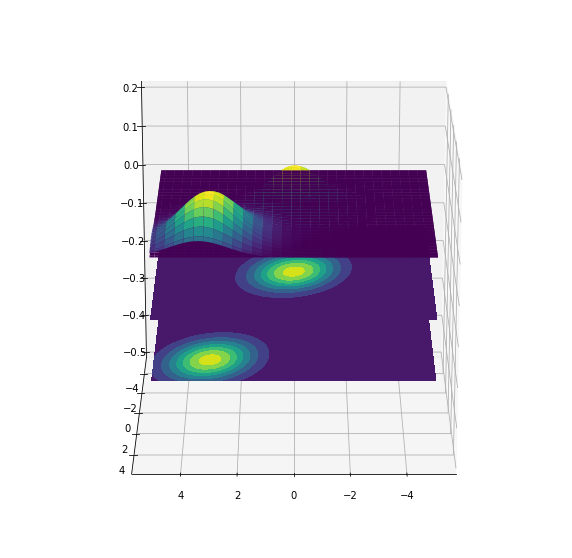

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
F1 = multivariate_normal(mu1, vcov)
Z1 = F1.pdf(pos)
F2 = multivariate_normal(mu2, vcov)
Z2 = F2.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z1, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax.plot_surface(X, Y, Z2, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z1, zdir='z', offset=-0.15)
cset = ax.contourf(X, Y, Z2, zdir='z', offset=-0.30)
ax.view_init(20,90)
ax.set_zlim(-0.5,0.2)


<span style="color:red"> ESTUDIAR ESTA RESPUESTA Y COMPLETAR!!!</span>

d) La elipse con centro en $(0,0)$ y radio $r$ se corresponde a la ecuación 
$$\frac{x^2}{a^2} + \frac{y^2}{b^2} = r^2,$$
donde $a$ y $b$ son las semilongitudes de los ejes de la elipse. 

### Cálculo de la elipse

La distancia de Mahalanobis para una matriz $\Sigma^{-1} = \left(\begin{array}{cc}u & v \\ v & w \end{array}\right)$ al punto $(0,0)$ resulta:
$$d_M^2 ((x,y), (0,0)) = (x,y)' \Sigma^{-1} (x,y) = u x^2 + 2 v xy + wy^2. \qquad \qquad (1)$$

Queremos encontrar los ejes de la elipse dada por $d_M ((x,y), (0,0))= \sqrt{2.952}$.
Dado que si $v\neq 0$ es porque se trata de una elipse rotada, analizamos la elipse canónica:
$$\frac{\tilde x^2}{a^2} + \frac{\tilde y^2}{b^2} = r^2 = 2.952.$$
Escribimos 
$$\begin{cases}
\tilde x &= x \cos \theta - y \sin\theta \\
\tilde y &= x \sin \theta + y \cos\theta
\end{cases}
= Q \cdot \left(\begin{array}{c}x \\ y \end{array}\right), \qquad \mbox{es decir} \qquad \left(\begin{array}{c}x \\ y \end{array}\right) = Q^T \left(\begin{array}{c}\tilde x \\ \tilde y \end{array}\right)
$$
donde $Q$ es la matriz de rotación.
Reemplazando $\tilde x$ y $\tilde y$ en la ecuación de la elipse resulta:
\begin{eqnarray}
\frac 1{a^2} \tilde x^2 &=& \frac 1{a^2}\left(x^2 \cos^2 \theta -2xy \sin\theta\cos\theta + y^2 \sin^2 \theta\right)\\
\frac 1{b^2} \tilde y^2 &=& \frac 1{b^2}\left(x^2 \sin^2 \theta +2xy \sin\theta\cos\theta + y^2 \cos^2 \theta\right)\\
\mbox{sumamos} & &\\
r^2 &= &x^2(\frac 1{a^2} \cos^2 \theta + \frac 1b\sin^2 \theta) + 2xy(\frac 1{b^2}-\frac 1{a^2})\sin\theta\cos\theta + y^2(\frac 1{a^2}\sin^2\theta + \frac 1{b^2}\cos^2\theta)
\end{eqnarray}

De aquí resulta, volviendo a la fórmula (1):
$$
\begin{cases}
u &= \frac 1{a^2} \cos^2 \theta + \frac 1{b^2}\sin^2 \theta\\
w &= \frac 1{a^2}\sin^2\theta + \frac 1{b^2}\cos^2\theta\\
v &= (\frac 1{b^2}-\frac 1{a^2})\sin\theta\cos\theta
\end{cases}
$$

Operando con estas ecuaciones obtenemos:
$$u+ w = \frac{1}{a^2} + \frac{1}{b^2}, \qquad 
w-u = (\frac{1}{b^2}-\frac 1{a^2}) \cos2\theta, \qquad \qquad 2v = (\frac{1}{b^2}-\frac 1{a^2}) \sin 2\theta$$.

Así los ejes principales de la elipse están en la dirección rotada por el ángulo $\theta$ de $(1,0)$ y $(0,1)$ respectivamente.

Luego $\tan 2\theta = \frac {2v}{w-u}$, es decir $$\theta = \frac 12 \tan^{-1} \frac {2v}{w-u}.$$

### Especificamos en el ejemplo

$$\Sigma^{-1} = \left(\begin{array}{cc}0.95 & -0.15 \\ -0.15 & 0.55 \end{array}\right).$$
Así tenemos que 
$$\tan 2\theta = -\frac{0.3}{-0.4} = 0.75, $$

In [13]:
theta = np.arctan(0.75)/2
theta2 = np.arctan(0.75)
cos2theta = np.cos(theta2)
sen2theta = np.sin(theta2)

<span style="color:red">CODIFIQUE AQUÍ ESTOS VALORES </span>

Tenemos $$
\begin{cases}
\frac 1{a^2} + \frac 1{b^2} &= 0.95 + 0.55 = 1.5, \\
\frac{1}{b^2}- \frac 1{a^2}  &= \frac {-0.4}{0.949}
\end{cases}
$$

<span style="color:red">CODIFIQUE AQUÍ ESTOS VALORES</span>

Sumando ambas ecuaciones, tenemos que 
$$
\frac 1{a^2} + \frac 1{b^2} + (\frac{1}{b^2}- \frac 1{a^2}) = \frac 2{b^2} = u + w + \cfrac{(w-u)}{cos(2\theta)}
$$
Luego
$$
b = \sqrt{\cfrac{2}{u+w+\cfrac{w-u}{cos(2\theta)}}}
$$

Similarmente para a,pero en este caso restamos ambas ecuaciones, obtenemos:
$$
\frac 1{a^2} + \frac 1{b^2} - (\frac{1}{b^2}- \frac 1{a^2})= \frac2{a^2} = u + w - \cfrac{(w-u)}{cos(2\theta)}
$$
y 
$$
a = \sqrt{\cfrac{2}{u+w-\cfrac{w-u}{cos(2\theta)}}}
$$

In [14]:
u = 0.95
w = 0.55
b = np.sqrt(2/(u+w+(w-u)/cos2theta))
a = np.sqrt(2/(u+w-(w-u)/cos2theta))
print("a = {}, b = {}".format(a,b))

a = 1.0, b = 1.4142135623730951


Luego la elipse no rotada es:
$$\frac {\tilde x^2}{1^2} + \frac{\tilde y^2}{(\sqrt 2)^2} = 2.952 = r^2.$$
Las longitudes de los ejes son:
$$ a_1 = \sqrt{2.952}, \qquad b_1 = \sqrt{2 \cdot 2.952}$$

<span style="color:red">CODIFIQUE AQUÍ LA ELIPSE Y HAGA UNA FUNCIÓN PARA USAR EN OTRA OCASIÓN</span>

La matriz de rotacion como visto en la resolución sería:

In [15]:
Q = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

Y queremos computar los ejes principales de la elipse con centro en $(0,0)$.
Ya vimos que la longitud de los ejes son $r$ y $\sqrt{2}r$, entonces, dada nuestra matriz de rotación, los ejes principales quedan:

In [16]:
r = np.sqrt(2.952)
ejea1 = (Q.transpose().dot([r,0]))
ejea1

array([ 1.62996932, -0.54332311])

In [17]:
ejeb1 = (Q.transpose().dot([0,np.sqrt(2)*r]))
ejeb1

array([0.76837491, 2.30512473])

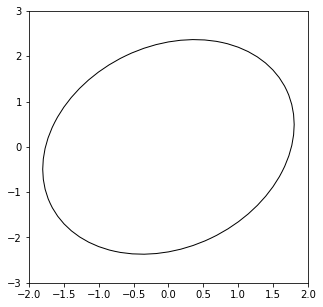

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from math import pi
fig,ax = plt.subplots(figsize=(5,5))
ax.add_patch( Ellipse((0,0),2*r,2*np.sqrt(2)*r,angle=-theta*180/pi,fill=False))
ax.set_xlim(-2,2)
ax.set_ylim(-3,3)
plt.show()

# Ejercicio 4. 

* (a) Describa un procedimiento para generar muestras aleatorias de acuerdo a una distribucion normal
$\mathcal{N}_d(\mu,\Sigma)$, y un código Python (puede usar algun paquete). 


* (b) Describa un procedimiento que calcule la funcion discriminante para una distribucion normal dada y probabilidad a priori $P(\omega_i)$, y un código Python (puede usar algun paquete).


* (c) Describa un procedimiento que calcule la distancia euclidea entre dos puntos arbitrarios.


* (d)  Escriba un procedimiento que calcule la distancia de Mahalanobis entre la media $\mu$ y un punto arbitrario $x$, dada la matriz de covarianza $\Sigma$.

Puede usar 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py



# *Respuesta*

Con el paquete numpy y la función https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html podemos obtener muestras aleatorias con distribución normal.


In [19]:
from numpy.random import multivariate_normal
def muestra(media,vcov,n):
    return np.random.multivariate_normal(media, vcov, n)

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ .</span>

Tenemos que la clasificación con tasa de error minimo puede  alcanzarse con la función discriminante:
$$\log g_i(x) = -\frac k2 \log(2\pi) -\frac {\log(\det(\Sigma))}2 - \frac 12(x-\mu)'\Sigma^{-1}(x-\mu)+\log P(\omega_i).$$

In [20]:
import numpy as np
from math import pi
def discriminante(mu,sigma,apriori):
    detSigma = np.linalg.det(sigma)
    invSigma = np.linalg.inv(sigma)
    return (lambda x: -np.log(2*pi) - np.log(detSigma)/2 - 0.5*np.transpose((x-mu))*invSigma.dot(x-mu) + np.log(apriori))

Discriminante lineal: mismas matriz de varianza covarianza
Discriminante cuadratico: matrices de covarianza distintas.

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>


Para calcular la distancia Euclidea entre dos puntos arbitrarios, $x,y$, debemos calcular la raiz cuadrada de las diferencias al cuadrado coordenada a coordenada
$$
d_{e}(X,Y) = \sqrt{\sum_{i=0}^n (y_{i}-x_{i})^{2}}
$$
Podemos hacerlo fácilmente con la librería scipy

In [21]:
from scipy.spatial.distance import euclidean
def de(x,y):
    return euclidean(x,y)

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

Para calcular la distancia de mahalanobis, es un poco mas complicado. Dada la media $\mu$ , un punto arbitrario $x$ y la matriz de varianza-covarianza $\Sigma$, para calcular la distancia de mahalanobis lo que tenemos que hacer es primero calcular la inversa de $\Sigma$,$\Sigma^{-1}$ y la distancia de mahalanobis esta dada por:
$$
d_{m}(x,\mu) = \sqrt{ (x-\mu)^{T}\Sigma^{-1}(x-\mu)}
$$

In [3]:
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
def dm(x,mu,sigma):
    isigma = inv(sigma)
    return mahalanobis(x,mu,isigma)
    

# Ejercicio 5. 



* (a)  Utilice el codigo del problema anterior para simular dos normales $(X_1,X_2)$ con $\Sigma= C^T.C$, y $C= \left(\begin{array}{cc}
0&-0.23\\
 0.83& .23\end{array}\right)$ y vectores de media $\mu_1 =(0,0)$ y $\mu_2=(1,1)$ respectivamente. 
 
 
* (b) Supongamos que las probabilidades a priori de las dos primeras categorias son iguales ($P(\omega_1)=P(\omega_2)=\displaystyle\frac12$, diseñe y codifique  un clasificador para  dos categorias normales utilizando solo el valor de caracteristica $X_1$ especificada en el inciso anteiror. El código resultante debe poder clasificar una nueva muestra basado en esta información. 

Recuerde que para el diseño del clasificador se estimará la media y varianza a partir de los datos de cada una de las muestras. Si para la muestra $i$ la media y varianza son $\mu_i$ y $\sigma_i^2$ respectivamente, se clasificará un valor $x$ en la muestra $1$ si 
$$\frac 1{\sqrt{2\pi\sigma_1^2}} e^{-(x-\mu_1)^2/2\sigma_1^2}P(\omega_1) > \frac 1{\sqrt{2\pi\sigma_2^2}} e^{-(x-\mu_2)^2/2\sigma_2^2}P(\omega_1).$$
Tomando logaritmos, y eliminando las probabilidades a priori $P(\omega_i)$ por ser iguales esto es equivalente a decidir por la clase 1 si 
$$-\frac 12 \ln(2\pi) - \ln \sigma_1 - \frac{(x-\mu_1)^2}{2\sigma_1^2} > 
-\frac 12 \ln(2\pi) - \ln \sigma_2 - \frac{(x-\mu_2)^2}{2\sigma_2^2}$$
es decir, si 
$$ \ln \sigma_1 + \frac{(x-\mu_1)^2}{2\sigma_1^2} <  \ln \sigma_2 + \frac{(x-\mu_2)^2}{2\sigma_2^2}.$$



* (c) Determinar el error de entrenamiento empirico en sus muestras, es decir, el porcentaje de puntos mal clasificados, dividiendo el conjunto de $n=100$ muestras aleatoriamente en 80\% entrenamiento 20\% test. Repita incrementando los valores de $n$, $100\leq n\leq 10000$ en pasos de 100 y grafique el error empirico obtenido.


* (d) Utilice la cota de Bhattacharyya para acotar el error que obtendran los  patrones nuevos obtenidos muestreando las distribuciones.


* (e) Repita todo lo anterior, pero ahora utilice dos caracteristicas, $X_1$ y $X_2$.


* (f) Analice sus resultados. En particular, ¿es siempre posible para un conjunto finito de datos que  el error empirico pueda ser mayor al aumentar la dimension de los datos?.

# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>  

In [23]:
import numpy as np
np.random.seed(0)
C = np.array([[0,-0.23],[0.83,0.23]])
sigma = np.dot(C.transpose(),C)
MU1 = np.array([0,0])
MU2 = np.array([1,1])
X1 = muestra(MU1,sigma,100)
X2 = muestra(MU2,sigma,100)


In [24]:
sigma

array([[0.6889, 0.1909],
       [0.1909, 0.1058]])

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ <br>

In [25]:
# Nos quedamos solamente con la primera coordenada, osea, solo una caracteristica
x1 = X1[:,0]
x2 = X2[:,0]
    

In [26]:
class ClasificadorNormales():
    def __init__(self):
        self.mus_estimadas = []
        self.stds_estimadas = []
        
    def fit(self,muestras):
        # Los datos me vienen en un arreglo de muestras
        # donde la muestra en la posición i-esima
        # se corresponde a las muestras generadas con la
        # normal i-esima
        self.mus_estimadas = [np.mean(muestra) for muestra in muestras]
        self.stds_estimadas = [np.std(muestra) for muestra in muestras]


    def discriminante(self,x,mu,sigma):
        return np.log(sigma)+((x-mu)**2)/(2*(sigma**2))      
    
    def predict(self,x):
        mus = self.mus_estimadas
        sigmas = self.stds_estimadas
        # Calculamos los discriminantes para cada cada una de las clases
        # y devolvemos el minimo
        discriminantes = np.array([self.discriminante(x,mu,sigma) for mu,sigma in zip(mus,sigmas)])
        return np.argmin(discriminantes)        
        
    def error(self,test_data):
        # test data es un arreglo de arreglos donde
        # la primera posición corresponde a la primera clase,
        # la segunda a la segunda y así
        errors = []
        for i in range(len(test_data)):
            errors += [(self.predict(x) != i) for x in test_data[i]]
        return np.mean(errors)

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

In [27]:
from sklearn.model_selection import train_test_split
# partimos en train y test
n = 100
errores = []
X1 = muestra(MU1,sigma,100)
X2 = muestra(MU2,sigma,100)
x1 = X1[:,0]
x2 = X2[:,0]
for i in range(n):
    np.random.seed(i)
    X1 = muestra(MU1,sigma,100)
    X2 = muestra(MU2,sigma,100)
    x1 = np.concatenate((x1,X1[:,0]))
    x2 = np.concatenate((x2,X2[:,0]))
    x1_train, x1_test,x2_train,x2_test = train_test_split(x1,x2,train_size = 0.8)
    # entrenamos el clasificador con la media de la muestra
    clasificador = ClasificadorNormales()
    clasificador.fit([x1_train,x2_train])
    errores.append(clasificador.error([x1_test,x2_test]))

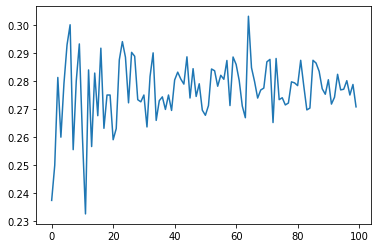

In [28]:
import matplotlib.pyplot as plt
plt.plot(errores)

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

Tenemos que la cota de Bhattacharyya para el caso normal bivariado, está dada por:
$$
P(error)\le \sqrt{P(\omega_{1})P(\omega_{2})}e^{k(1/2)}
$$
donde 
$$
k(1/2) = 1/8(\mu_{2}-\mu_{1})^{t}\left[\cfrac{\Sigma_{1}+\Sigma_{2}}{2}^{-1}(\mu_{2}-\mu_{1})\right] + \cfrac 12 ln \cfrac{\cfrac{|\Sigma_{1}+\Sigma_{2}|}{2}}{\sqrt|\Sigma_{1}||\Sigma_{2}|}
$$


In [29]:
def bhatta(P,mu1,mu2,sigma1,sigma2,n):
    aprioris = np.sqrt(np.prod(P))
    # calculamos cuantas distribuciones tenemos
    if n>=2:
        t1_1 = (1/8)*(mu2-mu1).transpose()
        t1_2 = np.dot(inv((sigma1+sigma2)*0.5),mu2-mu1)
        t1 = np.dot(t1_1,t1_2)
        t2 = 0.5*np.log((det(sigma1+sigma2)/2)/np.sqrt(det(sigma1)*det(sigma2)))
    else:
        # Tenemos desviacion estandar, no matriz de varianzacovarianza
        t1_1 = (1/8)*(mu2-mu1)
        t1_2 = (sigma1+sigma2)*0.5*(mu2-mu1)
        t1 = t1_1*t1_2
        t2 = 0.5*np.log(((sigma1+sigma2)/2)/(np.sqrt(sigma1*sigma2)))        
    expo = t1+t2
    bhattabound = np.exp(-expo)*aprioris

    return bhattabound

In [30]:
det(sigma)

0.03644280999999999

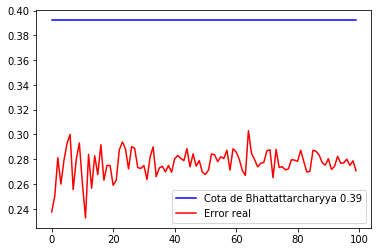

In [31]:
bhattabound = bhatta(np.array([0.5,0.5]),0,1,sigma[0][0],sigma[1][1],1)
fig,ax = plt.subplots()
plt.plot([bhattabound]*100,c='b',label='Cota de Bhattattarcharyya {:.2f}'.format(bhattabound))
plt.plot(errores,c='r',label='Error real')
plt.legend(loc='best')

 <span style="color:red"> RESPONDA EL INCISO E AQUÍ </span>

Tenemos que para que caso general multivariado, donde lo que queremos clasificar es un vector, la fórmula general para el discriminante es:
$$
g_{i}(x) = \cfrac 12 (\mathbf{x}-\mu_{i})^{t}\Sigma_{i}^{-1}(\mathbf{x}-\mu_{i}) -\cfrac d2 ln(2\pi) - ln|\Sigma_{i}| + ln(P(w_{i}))
$$
Sin embargo, podemos omitir el termino $-\cfrac d2 ln(2\pi)$ al ser igual para todas las clases..

In [32]:
class ClasificadorNormalesMulti():
    def __init__(self,apriori):
        self.mus_estimadas = []
        self.vcovs_estimadas = []
        self.P = apriori
        
    def fit(self,muestras):
        # Los datos me vienen en un arreglo de muestras
        # donde la muestra en la posición i-esima
        # se corresponde a las muestras generadas con la
        # normal i-esima
        self.mus_estimadas = [np.mean(muestra,axis=0) for muestra in muestras]
        self.vcovs_estimadas = [np.cov(muestra.T) for muestra in muestras]


    def discriminante(self,x,mu,vcov,p):
        vcov_inv = inv(vcov)
        t1 = -0.5*np.dot(np.dot(x-mu,vcov_inv),x-mu)
        t2 = -0*5*np.log(det(vcov))
        w0 = np.log(p)
        return t1+t2+w0
    
    def predict(self,x):
        mus = self.mus_estimadas
        sigmas = self.vcovs_estimadas
        P = self.P
        # Calculamos los discriminantes para cada cada una de las clases
        # y devolvemos el máximo
        discriminantes = np.array([self.discriminante(x,mu,sigma,p) for mu,sigma,p in zip(mus,sigmas,P)])
        return np.argmax(discriminantes)        
        
    def error(self,test_data):
        # test data es un arreglo de arreglos donde
        # la primera posición corresponde a la primera clase,
        # la segunda a la segunda y así
        errors = []
        for i in range(len(test_data)):
            errors += [(self.predict(x) != i) for x in test_data[i]]
        return np.mean(errors)

In [33]:
from sklearn.model_selection import train_test_split
# partimos en train y test
n = 100
errores_multi = []
x1 = muestra(MU1,sigma,100)
x2 = muestra(MU2,sigma,100)
for i in range(n):
    np.random.seed(i)
    X1 = muestra(MU1,sigma,100)
    X2 = muestra(MU2,sigma,100)
    x1 = np.concatenate((x1,X1))
    x2 = np.concatenate((x2,X2))
    x1_train, x1_test,x2_train,x2_test = train_test_split(x1,x2,train_size = 0.8)
    # entrenamos el clasificador con la media de la muestra
    clasificador_multi = ClasificadorNormalesMulti([0.5,0.5])
    clasificador_multi.fit([x1_train,x2_train])
    errores_multi.append(clasificador_multi.error([x1_test,x2_test]))

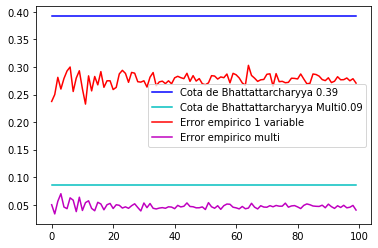

In [34]:
bhattabound_multi = bhatta(np.array([0.5,0.5]),MU1,MU2,sigma,sigma,2)
fig,ax = plt.subplots()
plt.plot([bhattabound]*100,c='b',label='Cota de Bhattattarcharyya {:.2f}'.format(bhattabound))
plt.plot([bhattabound_multi]*100,c='c',label='Cota de Bhattattarcharyya Multi{:.2f}'.format(bhattabound_multi))

plt.plot(errores,c='r',label='Error empirico 1 variable')
plt.plot(errores_multi,c='m',label='Error empirico multi')

plt.legend(loc='best')

 <span style="color:red"> RESPONDA EL INCISO F AQUÍ </span>

# Ejercicio 6. 

Considere el problema de clasificacion bidimensional en cuatro categorias con 
$x|\omega_1\sim \mathcal{N}(\mathbf{0},\mathbf{I})$, $x |\omega_2\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 1\end{array}\right),\mathbf{I}\right)$, $x |\omega_3\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 -3\end{array}\right),\left(\begin{array}{cc}
 2&0.5\\
 0.5&2\end{array}\right)\right)$ y $x |\omega_4\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 2\end{array}\right),\left(\begin{array}{cc}
 5&4\\
 4&5\end{array}\right)\right)$ y $P (\omega_i)=\displaystyle\frac14$ para todo i.
 
 * (a) ¿Cual es la distancia de Mahalanobis entre cada uno de los puntos $(1, 2)^T, (5, 3)^T, (0, 0)^T,
 (1, 0)^T$ y las medias de cada una de las clases.
 

* (b) Clasificar estos puntos.

* (c) Suponga que $P(\omega_1)=0.7$ y $P(\omega_2)=P(\omega_3)=P(\omega_4)=0.1$, y clasifique nuevamente los puntos.


Recuerde que como las clases son equiprobables, para clasificar los puntos se busca el máximo de los $g_i(x)$, con 
$$g_i(x) = -\ln(\det(\Sigma_i)) -  (x-\mu_i)'\Sigma_i^{-1}(x-\mu_i).$$


# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>  

In [2]:
mu1 = np.array([0,0])
vcov1 = np.identity(2)
mu2 = np.array([1,1])
vcov2 = np.identity(2)
mu3 = np.array([1,-3])
vcov3= np.array([[2,0.5],[0.5,2]])
mu4 = np.array([1,2])
vcov4 = np.array([[5,4],[4,5]])
mus = [mu1,mu2,mu3,mu4]
vcovs = [vcov1,vcov2,vcov3,vcov4]
x1 = [1,2]
x2 = [5,3]
x3 = [0,0]
x4 = [1,0]
puntos = [x1,x2,x3,x4]

In [8]:
dist_mah = []
for punto in puntos:
    dist = [dm(punto,mu,sigma) for mu,sigma in zip(mus,vcovs)]
    dist_mah.append(dist)
    print("La distancia del punto x = {} a la media de cada una de las clases es:".format(punto))
    print(dist)
    print()
    

La distancia del punto x = [1, 2] a la media de cada una de las clases es:
[2.23606797749979, 1.0, 3.651483716701107, 0.0]

La distancia del punto x = [5, 3] a la media de cada una de las clases es:
[5.830951894845301, 4.47213595499958, 4.618802153517006, 2.4267032964268394]

La distancia del punto x = [0, 0] a la media de cada una de las clases es:
[0.0, 1.4142135623730951, 2.4765567494675613, 1.0]

La distancia del punto x = [1, 0] a la media de cada una de las clases es:
[1.0, 1.0, 2.1908902300206647, 1.4907119849998598]



 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>  

Ahora para saber los discriminantes, necesitamos saber los determinantes de cada una de las matrices de varianza-covarianza. Vamos a calcular esos determinantes y tomar la clase $i$ que tenga $g_{i}$ maximo en cada x. Como ya tenemos las distancias de mahalanobis a cada punto, solamente resta multiplicar cada uno de esos numeros por el determinante de la matriz de varianza/covarianza de cada $\omega_{i}$ respectivamente

In [9]:
dets = [np.linalg.det(vcov) for vcov in vcovs]

In [13]:
discriminantes = []
i = 0
for dists in dist_mah:
    discriminante_x = [-np.log(det)-dist for det,dist in zip(dets,dists)]
    discriminantes.append(discriminante_x)
    print("El punto {} corresponde a la clase w{}".format(puntos[i],np.argmax(discriminante_x)+1))
    i+=1

El punto [1, 2] corresponde a la clase w2
El punto [5, 3] corresponde a la clase w2
El punto [0, 0] corresponde a la clase w1
El punto [1, 0] corresponde a la clase w1


Las clases son como se sigue:
- x1: $\omega_{2}$
- x2: $\omega_{2}$
- x3: $\omega_{1}$
- x4: $\omega_{1},\omega_{2}$ ambas son igual de buenas/malas

    

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>  
Para esta situación se tienen en cuenta además los pesos de cada clase. Luego se clasifica en la clase $i$ que maximiza $g_i$, con:
$$g_i(x) = -\frac 12 \ln(\Sigma_i) -\frac 12 dM(x,\mu_i) + \ln P(\omega_i).$$


Ahora como ya tenemos calculada toda la primera parte en los respectivos arreglos, solamente debemos sumar los pesos.

In [18]:
w = [0.7,0.1,0.1,0.1]
discriminantes_conapriori=[]
i=0
for disc in discriminantes:
    disc_apriori = [-0.5*disci + np.log(wi) for disci,wi in zip(disc,w)]
    discriminantes_conapriori.append(disc_apriori)
    print("El punto {} pertenece a la clase {}".format(puntos[i],np.argmax(disc_apriori)+1))
    i+=1

El punto [1, 2] pertenece a la clase 1
El punto [5, 3] pertenece a la clase 1
El punto [0, 0] pertenece a la clase 1
El punto [1, 0] pertenece a la clase 1


Lo cual tiene bastante sentido pues ln(0.1) es un numero que resta bante en el calculo de las g_i, y esta bien que así sea pues las clases que no son 1 tienen muy baja probabilidad de ocurrencia

# Ejercicio 7. 
Suponiendo que $\lambda_{21}>\lambda_{11}$ y $\lambda_{12}>\lambda_{22}$, 

* a) mostrar que la funcion discriminante de riesgo minimo general para el caso binario independiente  esta
dado por $$g(x)=w^Tx+\omega_0$$, donde $w$ es constante, y
$$\omega_0=\displaystyle\sum_{i=1}^d\ln\displaystyle\frac{1-p_i}{1-q_i}+\ln\displaystyle\frac{P(\omega_1)}{P(\omega_2)}+\ln\displaystyle\frac{\lambda_{21}-\lambda_{11}}{\lambda_{12}-\lambda_{22}}$$

* b) Codifique esta función discriminante, diga qué valores debe tener de entrada para clasificar un nuevo dato. 

* c) Simule una muestra aleatoria de tamaño 100 de distribución binaria con probabilidades $p_i=0.3$ y $q_i=0.8$, y considere igual probabilidades a priori y pérdida cero uno. Clasifique esa muestra con la función anterior.

 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>


 
 Tenemos que la función discriminante para cada clase está dada por:
$$g_1(x) = - R(\alpha_1|x) = -(\lambda_{11}P(\omega_1|x) + \lambda_{12}P(\omega_2|x))$$
$$g_2(x) = - R(\alpha_2|x) = -(\lambda_{21}P(\omega_1|x) + \lambda_{22}P(\omega_2|x))$$


Dado que son dos clases, se puede considerar el discriminante $g(x) = g_1(x)-g_2(x)$ y clasificar en la clase $1$ si $g(x)>0$. Observamos entonces que:

$$
\begin{eqnarray}
g(x) &=& P(\omega_1|x)\cdot(\lambda_{21}-\lambda_{11}) + P(\omega_2|x)\cdot(\lambda_{22}-\lambda_{12}) \\
     &=& \frac{p(x | \omega_1) P(\omega_1)}{p(x)} \cdot(\lambda_{21}-\lambda_{11}) + \frac{p(x | \omega_2)P(\omega_2)}{p(x)}\cdot(\lambda_{22}-\lambda_{12}) \\
     &=& \frac{p(x | \omega_1) P(\omega_1)}{p(x)} \cdot(\lambda_{21}-\lambda_{11}) - \frac{p(x | \omega_2)P(\omega_2)}{p(x)}\cdot(\lambda_{12}-\lambda_{22}) 
\end{eqnarray}
$$ 

Así se clasifica en la clase 1 si $g(x)>0$, o lo que es lo mismo, si 
$$\frac{p(x | \omega_1) P(\omega_1)\cdot(\lambda_{21}-\lambda_{11}) } {p(x | \omega_2)P(\omega_2)\cdot(\lambda_{12}-\lambda_{22}) } > 1 \qquad (*)$$

Tomando logaritmos, $(*)$ es equivalente a:
$$\ln\frac{p(x | \omega_1) }{p(x|\omega_2} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{22}-\lambda_{12}}> 0. \qquad (**)$$

### <font color = green> Caso de variables binarias independientes </font>

Si se trata de variables binarias, independientes, entonces tenemos
$$x = (x_1,x_2,\dots, x_d),\qquad x_i = 0, 1,$$
y 
$$p(x_i=1 | \omega_j) = \begin{cases} p_i & \omega_j = \omega_1 \\ q_i & \omega_j = \omega_2
\end{cases}$$

Podemos escribir también:
$$p(x_i | \omega_j) = \begin{cases} p_i^{x_i}(1-p_i)^{1-x_i} & \omega_j = \omega_1 \\
q_i^{x_i}(1-q_i)^{1-x_i} & \omega_j = \omega_2
\end{cases}
$$
Como son independientes, entonces $p((x_1x_2\dots x_d)|\omega_j) = p(x_1|\omega_j)p(x_2|\omega_j)\dots p(x_d|\omega_j)$, para $j=1,2$.

Ahora en la fórmula de $g(x)$ podemos eliminar el factor común $p(x)$ y tomar logaritmos. Así resulta que $(**)$ es equivalente a:

$$ \sum_{i=1}^d x_i \ln\frac{p_i}{q_i} + \sum_{i=1}^d (1-x_i) \ln\frac{1-p_i}{1-q_i} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{22}-\lambda_{12}}> 0.$$
Agrupando los $x_i$ resulta:
$$\underbrace{\sum_i  \left(\ln\frac{p_i}{q_i}-\ln\frac{1-p_i}{1-q_i}\right)\cdot x_i }_{w^T\cdot x}+ \underbrace{\sum_{i=1}^d \ln\frac{1-p_i}{1-q_i} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{22}-\lambda_{12}}}_{w_0}> 0.$$

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>  

In [23]:
def discriminanteBinario(x,w1,w2,P1,P2,perdidas):
    perdida = (perdidas[1][0]-perdidas[0][0])/(perdidas[0][1]-perdidas[1][1])
    if(x==1):
        p_x_w1 = w1
        p_x_w2 = w2
    else:
        p_x_w1 = 1 - w1
        p_x_w2 = 1 - w2
    d = np.log(p_x_w1/p_x_w2) + np.log(P1/P2) + np.log(perdida)
    if d > 0:
        return 1
    else:
        return 2

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>  

In [27]:
import numpy as np
np.random.seed(1234)
p=0.3
q=0.8
perdidas = np.array([[0,1],[1,0]])
x1 = np.random.binomial(1,p,50)
x2 = np.random.binomial(1,q,50)
predx1 = np.array([])
predx2 = np.array([])

for x in x1:
    predx1 = np.append(predx1,discriminanteBinario(x,p,q,0.5,0.5,perdidas))
for x in x2:
    predx2 = np.append(predx2,discriminanteBinario(x,p,q,0.5,0.5,perdidas))

In [25]:
predx1

array([1., 1., 1., 2., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
       1., 2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
       2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
predx2

array([2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2.])

La prediccion es un poco pava pues si es x = 0 lo asigna a w1, que es la clase con mayor probabilidad de 0, y si x=1 lo asigna a la clase w2

Ahora vamos a hacer el mismo clasificador pero para vectores de caracteristicas.

In [92]:
def discriminanteBinarioMulti(x,p,q,P1,P2,perdidas):
    # p, q son vectores, x es un vector de caracteristicas
    perdida = (perdidas[1][0]-perdidas[0][0])/(perdidas[0][1]-perdidas[1][1])
    w = np.log(p/q) - np.log((1-p)/(1-q))
    wtx = np.dot(w.transpose(),x)
    w0 = sum( np.log((1-pi)/(1-qi)) for pi,qi in zip(p,q)) + np.log(P1/P2) + np.log(perdida)
    if wtx+w0 > 0:
        return 1
    else:
        return 2

In [93]:
p = 0.3
q = 0.8
x1_multi = [np.random.binomial(1,p,50) for _ in range(50)]
x2_multi = [np.random.binomial(1,q,50) for _ in range(50)]

In [94]:
p=np.array([0.3]*50)
q=np.array([0.8]*50)
perdidas = np.array([[0,1],[1,0]])
predx1_multi = np.array([])
predx2_multi = np.array([])
for x in x1_multi:
    predx1_multi = np.append(predx1_multi,discriminanteBinarioMulti(x,p,q,0.5,0.5,perdidas))
for x in x2_multi:
    predx2_multi = np.append(predx2_multi,discriminanteBinarioMulti(x,p,q,0.5,0.5,perdidas))

In [95]:
predx1_multi

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
predx2_multi

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Ahora el clasificador es un poco mas interesante pues realiza su clasificación sobre un vector de elementos, basandose en la cantidad de 0 y 1 de el vector. 

# Ejercicio 8. 

La distribucion de Poisson para una variable discreta $x = 0, 1, 2,\ldots$ y parametro real $\lambda$ es
$$P(x|\lambda)=e^{-\lambda}\displaystyle\frac{\lambda^x}{x!}$$

Considere el problema de clasificacion en dos categorias igualmente probables con distribuciones de Poisson, pero con diferentes parametros $\lambda_1>\lambda_2$.

 * (a) ¿Cual es la regla de clasificacion de Bayes?
 
 * (b) ¿Cual es la tasa del error de Bayes?
 
* (c) Codifique esta función discriminante, diga qué valores debe tener de entrada para clasificar un nuevo dato. 

* (d) Simule una muestra aleatoria de tamaño 100 de distribución de Poisson con $\lambda_1=1.8$, $\lambda_2=0.4$, y considere igual probabilidades a priori y pérdida cero uno. Clasifique esa muestra con la función anterior. Estime el Error cometido, y compárelo con el error de Bayes calculado. 



# *Respuesta*

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>  

La regla de clasificación de bayes es clasifico a x como $\omega_{1}$ si $P(\omega_{1}|x) > P(\omega_{2}|x)$ o bien equivalentement $P(x|\omega_{1})P(\omega_{1})>P(x|\omega_{2}P(\omega_{2})$.
Como $P(\omega_{1})=P(\omega_{2})$, vamos a clasificar a x como $\omega_{1}$ si 
$$
\cfrac{P(x|\omega_{1})}{P(x|\omega_{2})} > 1
$$
En nuestro caso particular con distribuciones de Poisson:
$$
\cfrac{P(x|\omega_{1})}{P(x|\omega_{2})} = \cfrac{e^{-\lambda_{1}}\lambda_{1}^{x}x!}{e^{-\lambda_{2}}\lambda_{2}^{x}x!} = e^{\lambda_{2}-\lambda_{1}} \left(\cfrac{\lambda_{1}}{\lambda_{2}}\right)^{x}
$$
Luego, clasificamos a $x$ como $\omega_{1}$ si 
$$
e^{\lambda_{2}-\lambda_{1}} \left(\cfrac{\lambda_{1}}{\lambda_{2}}\right)^{x} > 1
$$
y sino lo clasificamos como $\omega_{2}$.

Empleando riesgos, la ecuación nos queda que clasificamos a $x$ como $\omega_{1}$ si 
$$
e^{\lambda_{2}-\lambda_{1}} \left(\cfrac{\lambda_{1}}{\lambda_{2}}\right)^{x} > \cfrac{\lambda_{12}-\lambda_{22}}{\lambda_{21}-\lambda_{11}}
$$

<span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>  

El error condicional de bayes está dado por:
$$
P(error|x) = min \left[P(x|\omega_{1})P(\omega_{1}),P(x|\omega_{2}P(\omega_{2}))\right] = min \left[e^{-\lambda_{1}}\displaystyle\frac{\lambda_{1}^x}{x!}P(\omega_{1}),e^{-\lambda_{2}}\displaystyle\frac{\lambda_{2}^x}{x!}P(\omega_{2})\right]
$$
Como vimos, para el caso continuo, dadas regiones de clasificación $R_{1},R_{2}$, tenemos que 
$$
P(error)= \int_{R_{2}} P(x|\omega_{1})P(\omega_{1})dx + \int_{R_{1}} P(x|\omega_{2})P(\omega_{2})dx
$$
Para el caso discreto con densidades de Poisson, esto nos queda:
$$
P(error) = 0.5 \sum_{i=0}^{x^{\ast}} e^{\lambda_{2}}\cfrac{\lambda_{2}^{i}}{i!} + 0.5\sum_{i=x^{\ast}}^{\infty} e^{\lambda_{1}}\cfrac{\lambda_{1}^{i}}{i!} 
$$
Donde $x^{\ast}$ es el limite de la region de clasificación.

Vamos a despejar un poco más las regiones de clasificación respecto de x aplicando logaritmos

$$
\begin{equation*}
e^{\lambda_{2}-\lambda_{1}} \left(\cfrac{\lambda_{1}}{\lambda_{2}}\right)^{x} > \cfrac{P(\omega_{1})}{P(\omega_{2})}) = 1 \\
\iff \\
x(ln(\lambda_{1}-ln(\lambda_{2}))-\lambda_{1}+\lambda_{2} > ln(1) = 0 \\
\iff \\
x(ln\lambda_{1}-ln\lambda_{2}) > \lambda_{1}-\lambda_{2}\\
\iff \\
x > \cfrac{\lambda_{1}-\lambda_{2}}{ln\lambda_{1}-ln\lambda_{2}}
\end{equation*}
$$

#### Luego, tenemos que:  
$$
x^{\ast} = \cfrac{\lambda_{1}-\lambda_{2}}{ln\lambda_{1}-ln\lambda_{2}}
$$

<span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>  

In [16]:
def discriminantePoisson(x,lamda1,lamda2,perdidas):
    perdida = (perdidas[1][0]-perdidas[0][0])/(perdidas[0][1]-perdidas[1][1])
    if x > (lamda1-lamda2)/(np.log(lamda1)-np.log(lamda2)):
        return 1
    else:
        return 2

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>  

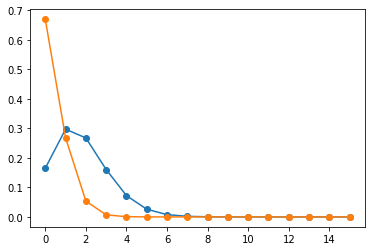

In [17]:
import numpy as np
from scipy.stats import poisson
from math import e
lamda1 = 1.8
lamda2 = 0.4
f = lambda x: (e**(lamda2-lamda1))*((lamda1/lamda2)**x)
x = np.linspace(0,15,16)
f1 = f(x)
plt.plot(x,poisson.pmf(x,lamda1),marker='o')
plt.plot(x,poisson.pmf(x,lamda2),marker='o')
plt.fill_between(x,0,f1,where = (f1 < 1),label='Clase 1')


In [28]:
np.random.seed(1234)
n = 1000
X1 = np.random.poisson(lamda1,n)
X2 = np.random.poisson(lamda2,n)
perdidas = np.array([[0,1],[1,0]])
clasX1 = ([discriminantePoisson(x,lamda1,lamda2,perdidas) for x in X1])
clasX2 = ([discriminantePoisson(x,lamda1,lamda2,perdidas) for x in X2])

In [29]:
error_estimado = (sum(clas != 1 for clas in clasX1) + sum(clas != 2 for clas in clasX2))/(2*n)
error_estimado

0.2545

Calculemos el error de bayes para $\lambda_{1} = 1.8,\lambda_{2}=0.4$  
- $x \in \omega_{1}$ sii:
$$
x > \cfrac{1.8-0.4}{ln(1.8)-ln(0.4)} = 0.93
$$
Cuya parte entera es 0, pero como esta mas cerca de 1 lo aproximamos por 1


Entonces el error nos queda:
$$
\begin{equation*}
\begin{split}
P(error) &= 0.5(\sum_{i=0}^{1} e^{-\lambda_{1}}\cfrac{\lambda_{1}^{i}}{i!}) + 0.5(\sum_{i=1}^{\infty} e^{-\lambda_{2}}\cfrac{\lambda_{2}^{i}}{i!})\\
&=0.5*0.46 + 0.5*0.33\\
&=0.23 + 0.16 \\
&=0.395
\end{split}
\end{equation*}
$$




In [ ]:
$$